<a href="https://colab.research.google.com/github/Rhitabrat/deep-learning-CS510/blob/main/hw2/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment 2

CS 510 - Deep Learning

Winter 2022

Instructor: Suresh Singh
<hr>
Sources Used

https://www.tensorflow.org/tutorials/images/cnn

https://github.com/arshren/Feature-Visualization/blob/master/Feature%20Visualization.ipynb

https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/


In [1]:
# import required libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

## Load CIFAR 10 data

In [6]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [7]:
# shape of the data
train_images.shape

(50000, 32, 32, 3)

In [8]:
test_images.shape

(10000, 32, 32, 3)

In [9]:
# normalize the data
train_images, test_images = train_images / 255.0, test_images / 255.0

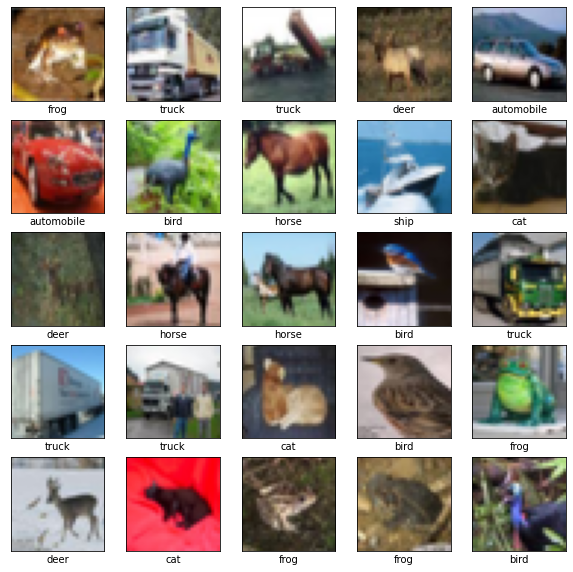

In [10]:
# visualization
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Experiment 1 [Qn 1a] - LeNet Model

In [61]:
%matplotlib inline

class LeNet():
    def __init__(self, learning_rate, activation, loss):
        self.learning_rate = learning_rate
        self.activation = activation
        self.loss = loss
        
    def create_layers(self):
        model = models.Sequential()
        model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation=self.activation,
                                input_shape=(32, 32, 3)))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
        model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation=self.activation))
        model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
        model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation='tanh',))

        model.add(layers.Flatten())
        model.add(layers.Dense(84, activation='tanh'))
        model.add(layers.Dense(10, activation='softmax'))

        # print(model.summary())
        
        return model

    def train_model(self, model):
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate),
              loss=self.loss,
              metrics=['accuracy'])

        history = model.fit(train_images, 
                    train_labels, 
                    epochs=20,
                    validation_data=(test_images, test_labels))
        return history
    
    def plot_acc_loss(self, history):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

        ax1.plot(history.history['accuracy'])
        ax1.plot(history.history['val_accuracy'])
        ax1.set_title("Learning Rate: " + str(self.learning_rate) + 
                "\nActivation: " + self.activation +
                ", Loss: "+ str(self.loss.name))
        ax1.set(xlabel='Epoch', ylabel='Accuracy')
        ax1.legend(['train', 'val'])

        ax2.plot(history.history['loss'])
        ax2.plot(history.history['val_loss'])
        ax2.set_title("Learning Rate: " + str(self.learning_rate) + 
                "\nActivation: " + self.activation +
                ", Loss: "+ str(self.loss.name))
        ax2.set(xlabel='Epoch', ylabel='Loss')
        ax2.legend(['train', 'val'])

        fig.show()

In [74]:
# hyperparameters
learning_rate = [0.1, 0.01, 0.001]
activation = ['sigmoid', 'tanh']
loss = [tf.keras.losses.MeanSquaredError(name="MSE"), 
        tf.keras.losses.SparseCategoricalCrossentropy(name="CrossEntropy")]

Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_180 (Conv2D)         (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d_120 (Aver  (None, 14, 14, 6)        0         
 agePooling2D)                                                   
                                                                 
 conv2d_181 (Conv2D)         (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_121 (Aver  (None, 5, 5, 16)         0         
 agePooling2D)                                                   
                                                                 
 conv2d_182 (Conv2D)         (None, 1, 1, 120)         48120     
                                                                 
 flatten_60 (Flatten)        (None, 120)             

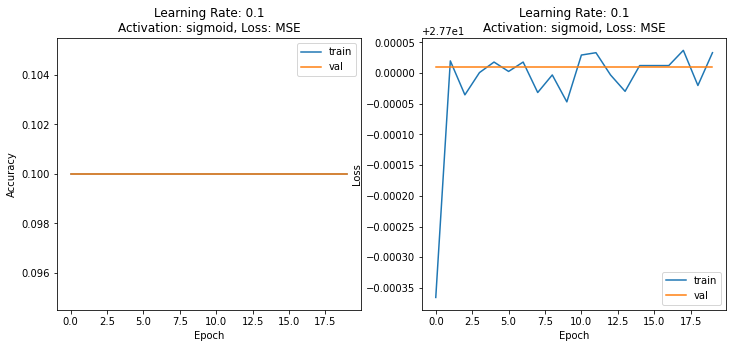

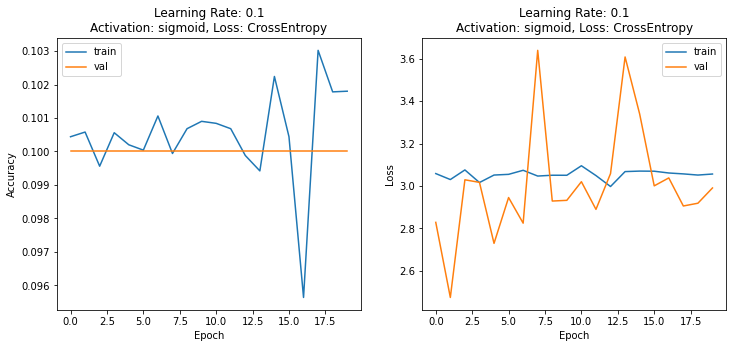

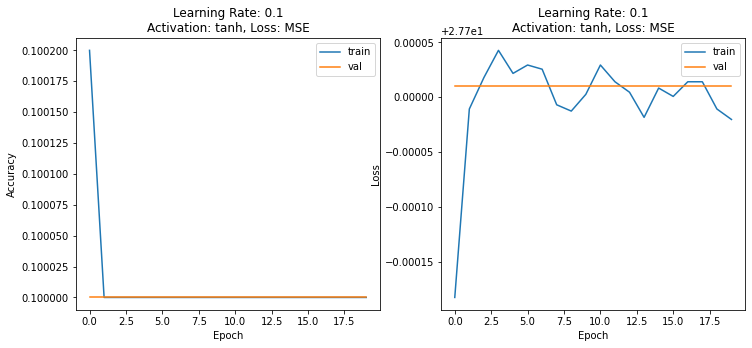

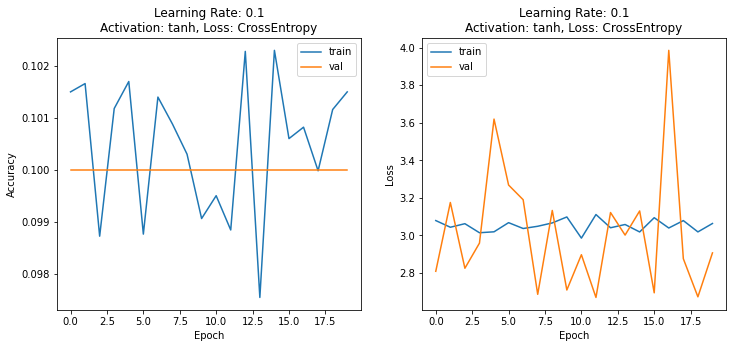

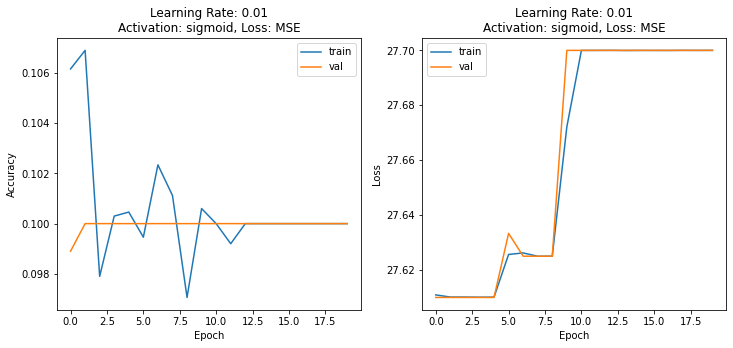

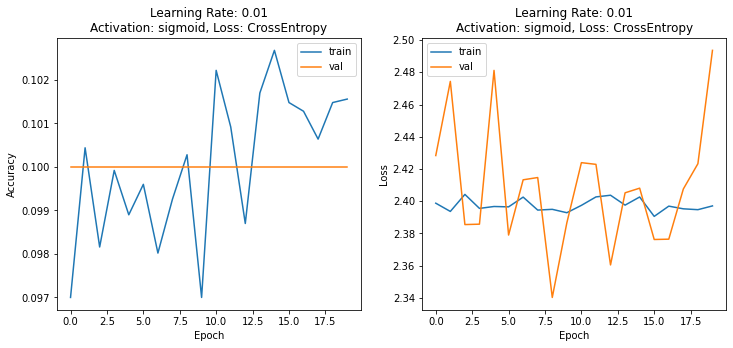

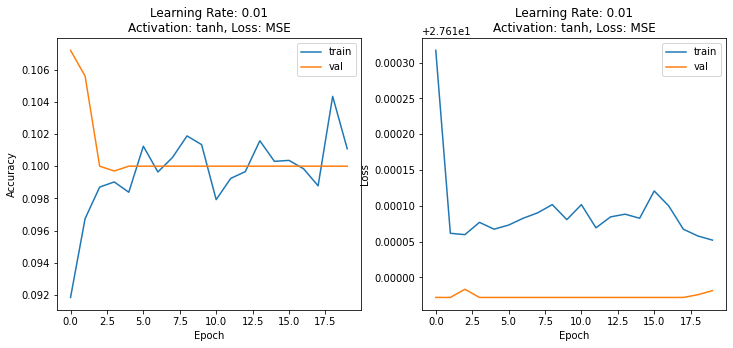

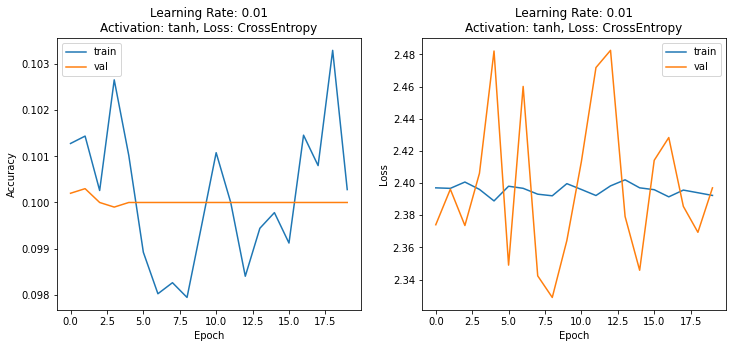

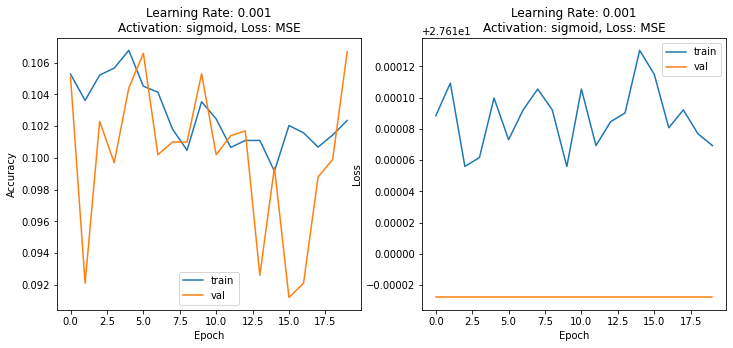

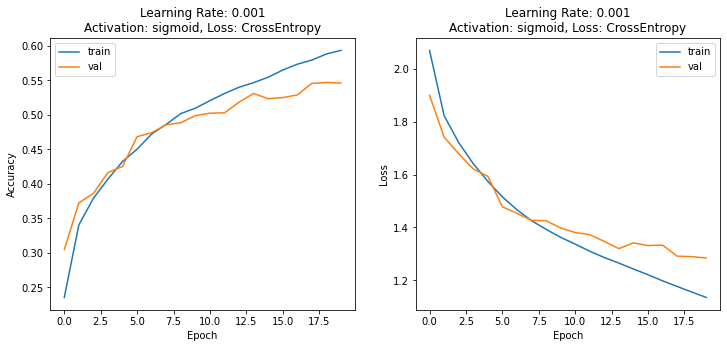

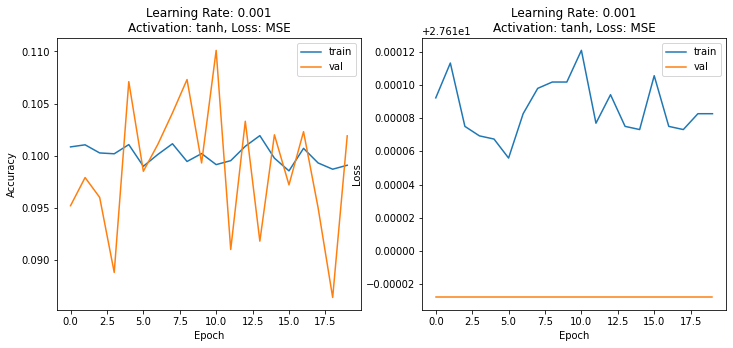

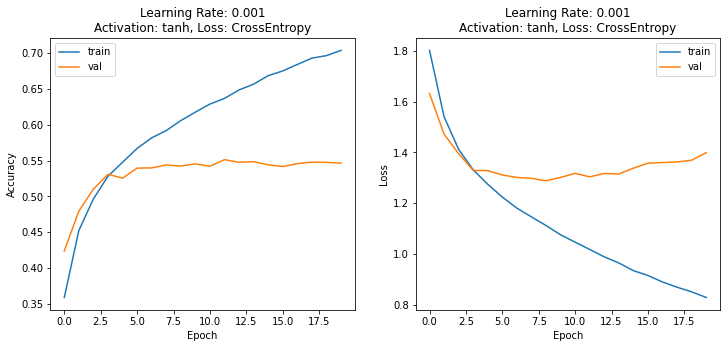

In [75]:
import gc

count = 0
for lr in learning_rate:
    for act in activation:
        for ls in loss:
            obj = LeNet(learning_rate=lr, activation=act, loss=ls)
            model_layers = obj.create_layers()
            
            if count==0:
                print(model_layers.summary())
            count+=1

            print("_________________________________________________________________")
            print(f"\n\nExperiment #{count}")    
            print("=================================================================")
            print("Learning Rate: ", lr)
            print("Activation   : ", act)
            print("Loss         : ", ls.name)
            print("=================================================================")

            history = obj.train_model(model_layers)
            obj.plot_acc_loss(history)
            del obj
            del history
            del model_layers
            gc.collect()

## Experiment 2 [1b] - Feature Map Visualization

In [7]:
ten_images = train_images[0:10]

In [8]:
learning_rate = 0.001
activation = 'sigmoid'
loss = tf.keras.losses.SparseCategoricalCrossentropy()

model_2 = models.Sequential()
model_2.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1,1), activation=activation, input_shape=(32, 32, 3)))
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model_2.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1,1), activation=activation))
model_2.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model_2.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation='tanh',))

model_2.add(layers.Flatten())
model_2.add(layers.Dense(84, activation='tanh'))
model_2.add(layers.Dense(10, activation='softmax'))

In [9]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 120)               0

In [10]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])

history = model_2.fit(train_images, 
                    train_labels, 
                    epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 14s 4ms/step - loss: 2.0661 - accuracy: 0.2360 - val_loss: 1.8987 - val_accuracy: 0.3117
Epoch 2/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8282 - accuracy: 0.3464 - val_loss: 1.7526 - val_accuracy: 0.3730
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7120 - accuracy: 0.3835 - val_loss: 1.6501 - val_accuracy: 0.4075
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6281 - accuracy: 0.4145 - val_loss: 1.5898 - val_accuracy: 0.4290
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5558 - accuracy: 0.4403 - val_loss: 1.5241 - val_accuracy: 0.4558
Epoch 6/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4969 - accuracy: 0.4615 - val_loss: 1.4946 - val_accuracy: 0.4609
Epoch 7/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4495 - accuracy: 0.4790 - val_loss: 1.5114 - val_accuracy

Which Conv layer output is used? conv2d_1


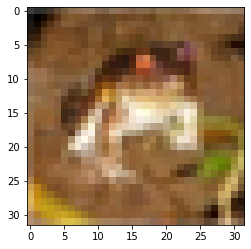

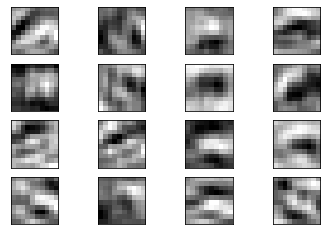

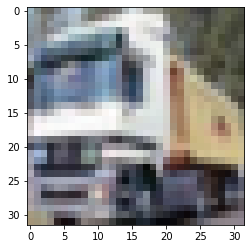

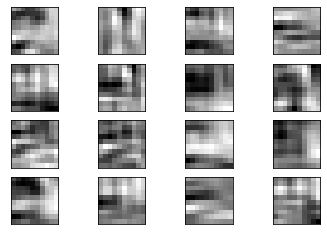

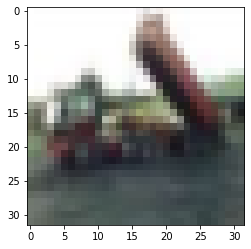

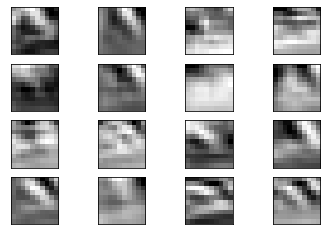

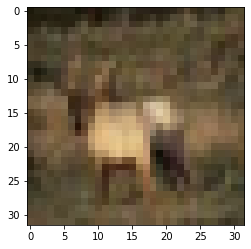

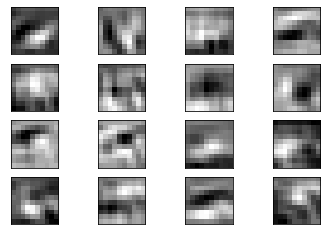

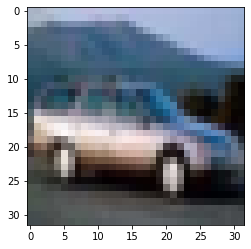

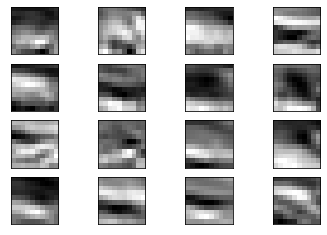

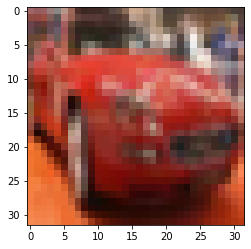

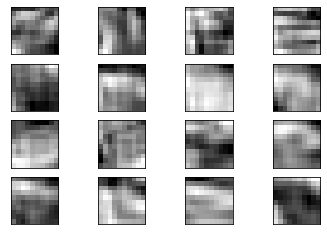

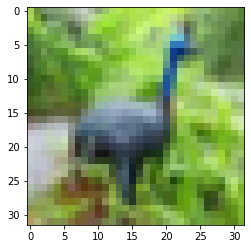

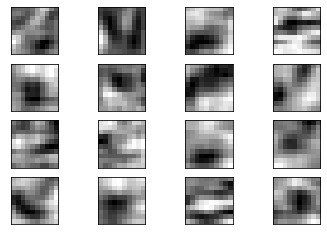

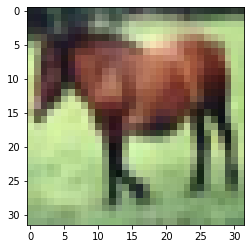

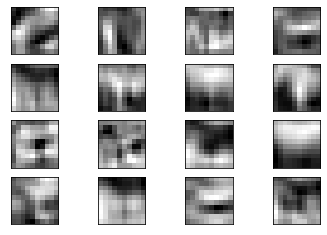

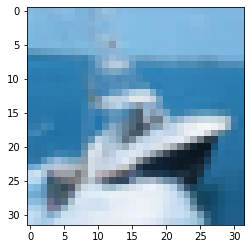

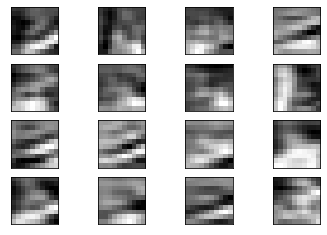

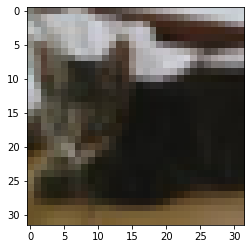

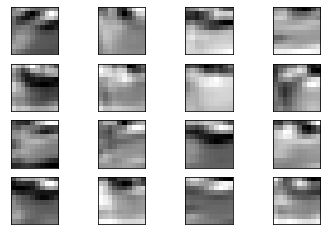

In [11]:
# images
from matplotlib import pyplot

successive_outputs = [layer.output for layer in model_2.layers[0:]]
visualization_model = tf.keras.models.Model(inputs = model_2.input, outputs = successive_outputs)

layer_names = [layer.name for layer in model_2.layers]
layer_name = layer_names[2]
print("Which Conv layer output is used?", layer_name)

for x in ten_images:

    plt.imshow(x)
    plt.show()

    x = x.reshape((1,) + x.shape)              

    x /= 255.0

    successive_feature_maps = visualization_model.predict(x)
    feature_map = successive_feature_maps[2]

    square = 4

    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(feature_map[0, :, :, ix-1], cmap='gray')
            ix += 1

    pyplot.show()

## Experiment 3 [Qn 2a] - 3 $\times$ 3 kernels

In [14]:
activation = 'relu'
learning_rate = 0.001
loss = tf.keras.losses.SparseCategoricalCrossentropy(name="CrossEntropy")

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(3, 3), strides=(1,1), activation=activation, input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(16, kernel_size=(3, 3), strides=(1,1), activation=activation))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2)))
model.add(layers.Conv2D(120, kernel_size=(5, 5), strides=(1,1), activation='tanh',))

model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_images, 
                    train_labels, 
                    epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5829 - accuracy: 0.4262 - val_loss: 1.3602 - val_accuracy: 0.5162
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3470 - accuracy: 0.5209 - val_loss: 1.2906 - val_accuracy: 0.5398
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2655 - accuracy: 0.5510 - val_loss: 1.2633 - val_accuracy: 0.5518
Epoch 4/20
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2104 - accuracy: 0.5707 - val_loss: 1.1930 - val_accuracy: 0.5796
Epoch 5/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1565 - accuracy: 0.5895 - val_loss: 1.1826 - val_accuracy: 0.5838
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.1194 - accuracy: 0.6052 - val_loss: 1.1497 - val_accuracy: 0.5936
Epoch 7/20
1563/1563 [==============================] - 5s 4ms/step - loss: 1.0749 - accuracy: 0.6202 - val_loss: 1.1220 - val_accuracy:

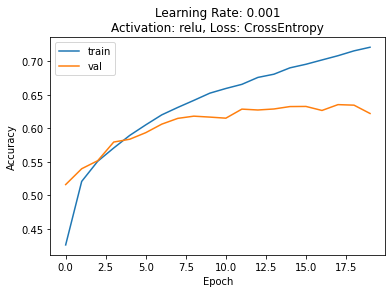

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Learning Rate: " + str(learning_rate) + 
          "\nActivation: " + activation +
          ", Loss: "+ str(loss.name))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

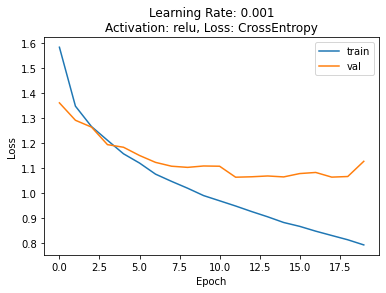

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Learning Rate: " + str(learning_rate) + 
          "\nActivation: " + activation +
          ", Loss: "+ str(loss.name))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

## Experiment 4 [QN 3] - 5 Convolution Layers

In [11]:
model_3 = models.Sequential()

model_3.add(layers.Conv2D(6, kernel_size=(3, 3), strides=(1,1), 
                        activation='relu', input_shape=(32, 32, 3), padding='same'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1,1)))

model_3.add(layers.Conv2D(16, kernel_size=(3, 3), strides=(1,1), 
                        activation='relu', padding='same'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1,1)))

model_3.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), 
                        activation='relu', padding='same'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1,1)))

model_3.add(layers.Conv2D(32, kernel_size=(3, 3), strides=(1,1), 
                        activation='relu', padding='same'))
model_3.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(1,1)))

model_3.add(layers.Conv2D(64, kernel_size=(3, 3), strides=(1,1), 
                        activation='relu', padding='same'))

model_3.add(layers.Flatten())
model_3.add(layers.Dense(128, activation='relu'))
model_3.add(layers.Dense(10, activation='softmax'))

In [12]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 6)         168       
                                                                 
 average_pooling2d_4 (Averag  (None, 31, 31, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_6 (Conv2D)           (None, 31, 31, 16)        880       
                                                                 
 average_pooling2d_5 (Averag  (None, 30, 30, 16)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        4640      
                                                                 
 average_pooling2d_6 (Averag  (None, 29, 29, 32)      

In [13]:
import time
start = time.time()

learning_rate = 0.001
loss = tf.keras.losses.SparseCategoricalCrossentropy(name="CrossEntropy")
# loss = tf.keras.losses.MeanSquaredError(name="MSE")

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss=loss,
              metrics=['accuracy'])

history = model_3.fit(train_images, 
                    train_labels, 
                    epochs=6, 
                    validation_data=(test_images, test_labels))

end = time.time()
total_time = end - start
print("\n"+ str(total_time))

Epoch 1/6
1563/1563 [==============================] - 11s 6ms/step - loss: 1.4983 - accuracy: 0.4555 - val_loss: 1.2885 - val_accuracy: 0.5420
Epoch 2/6
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1522 - accuracy: 0.5896 - val_loss: 1.0655 - val_accuracy: 0.6228
Epoch 3/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9564 - accuracy: 0.6619 - val_loss: 1.0163 - val_accuracy: 0.6429
Epoch 4/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7968 - accuracy: 0.7164 - val_loss: 1.0740 - val_accuracy: 0.6418
Epoch 5/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6430 - accuracy: 0.7718 - val_loss: 1.0933 - val_accuracy: 0.6439
Epoch 6/6
1563/1563 [==============================] - 9s 6ms/step - loss: 0.4835 - accuracy: 0.8295 - val_loss: 1.1773 - val_accuracy: 0.6527

57.95664095878601


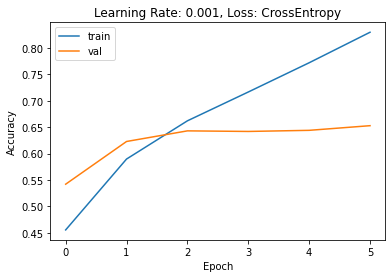

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Learning Rate: " + str(learning_rate) +
          ", Loss: "+ str(loss.name))
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

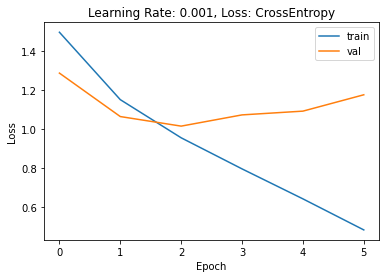

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Learning Rate: " + str(learning_rate) + 
          ", Loss: "+ str(loss.name))
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'])
plt.show()

In [17]:
!nvidia-smi

Mon Feb  7 04:34:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    35W / 250W |   1729MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [18]:
!lscpu |grep 'Model name'

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz


In [21]:
!lscpu | grep "MHz"

CPU MHz:             2299.998


In [22]:
!free -h --si | awk  '/Mem:/{print $2}'

26G


In [23]:
!df -h / | awk '{print $4}'

Avail
125G
